# Line plot; Raster plot; Dist plot (for fig2)
1. line plot for recall across shared events (averaged across all subjects per condition)
2. raster plot: free condition recall per event for each subject (N=18)
3. raster plot: yoke condition recall per event for each subject (N=53)
4. raster plot: passive condition recall per event for each subject (N=55)
5. histogram for 10,000 samples of 18 subjects from passive condition (with choice events: 64 events)
6. histogram for 10,000 samples of 18 subjects from passive condition (excluding choice events: 49 events)

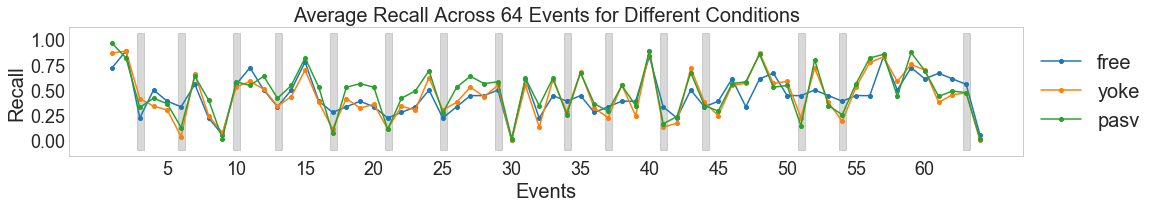

In [ ]:
# 1. line plot for recall across shared events (averaged across all subjects per condition)

import pandas as pd
import matplotlib.pyplot as plt

# Load the updated Excel file
file_path = './4_line_raster_dist_plots/mean_64ev-rcl.xlsx'  # Adjust the path if necessary
data = pd.read_excel(file_path)

# Extract the "choice_event" row and drop it from the main data
choice_event = data.loc[data['cond'] == 'choice_event'].iloc[0, 1:].astype(int)
data = data[data['cond'] != 'choice_event']

# Transpose the data to plot it in the required format
data_transposed = data.set_index('cond').transpose()
data_transposed.index = range(1, 65)

# Set a modern style
plt.style.use('seaborn-whitegrid')

# Plot the data
plt.figure(figsize=(16, 3), facecolor='white')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Define custom colors
markers = ['o', 'o', 'o']  # Define markers for the lines

for idx, condition in enumerate(data_transposed.columns):
    plt.plot(data_transposed.index, data_transposed[condition],
             label=condition,
             color=colors[idx],
             marker=markers[idx],
             linewidth=1.5,
             markersize=4,
             linestyle='-')

# Mark choice events with shaded areas
for idx in range(len(choice_event)):
    if choice_event[idx] == 1:
        plt.fill_betweenx([-.1, data_transposed.max().max()+.1], idx+0.8, idx+1.3, color='grey', alpha=0.3)

# Add labels and title
plt.xlabel('Events', fontsize=20)
plt.ylabel('Recall', fontsize=20)
plt.title('Average Recall Across 64 Events for Different Conditions', fontsize=20)

plt.legend(fontsize=20, shadow=True, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
# Set x-axis ticks to start from 1
plt.xticks(ticks=range(5, 65,5), fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.savefig('./4_line_raster_dist_plots/line_mean-recall.png', bbox_inches='tight')
plt.savefig('./4_line_raster_dist_plots/line_mean-recall.svg', bbox_inches='tight')
plt.show()


# Raster plot

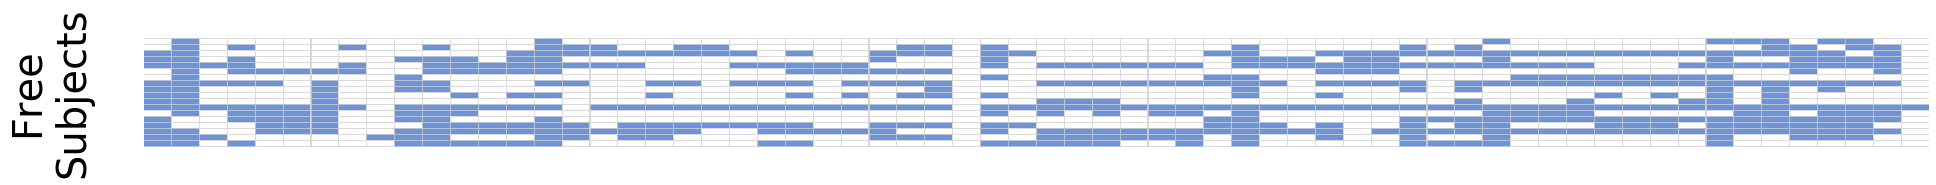

In [ ]:
# 2. raster plot: free condition recall per event for each subject (N=18)

import xianfunc as xf

f = './4_line_raster_dist_plots/64ev-rcl.xlsx'
d = xf.num_data_clean(xf.read_data(f,[i for i in range(1,65)],sheet=1))
m = xf.convert_list_array(xf.dict_to_lists(d)[0]).T

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Generate a binary matrix of size 18x64
binary_matrix = m
# Get the first color from the muted palette
muted_palette = sns.color_palette('muted')
first_color = muted_palette[0]  # Typically a muted blue

# Create a custom colormap: white for 0, first color for 1
cmap = ListedColormap(['white', first_color])

# Plot the binary matrix
plt.figure(figsize=(32, 2))  # Adjusted height to 3 for a flatter plot
# Create the heatmap
ax = sns.heatmap(binary_matrix, cmap=cmap, cbar=False, linewidths=0.2, 
                 linecolor='lightgrey', alpha=0.8, square=False, 
                 xticklabels=False, yticklabels=False)

# Customize the plot
# plt.title('Binary Matrix 18x64', fontsize=20)
# plt.xlabel('Events', fontsize=15)
plt.ylabel('Free\nSubjects\n',rotation=90, fontsize=40)
# plt.xticks(range(1, 65, 3), range(1, 65, 3), fontsize=14)

# # Remove horizontal grid lines
# for spine in ax.spines.values():
#     spine.set_visible(False)

# Save and display the plot
plt.savefig('./4_line_raster_dist_plots/raster_recall-free.png', bbox_inches='tight')
plt.savefig('./4_line_raster_dist_plots/raster_recall-free.svg', bbox_inches='tight')
plt.show()


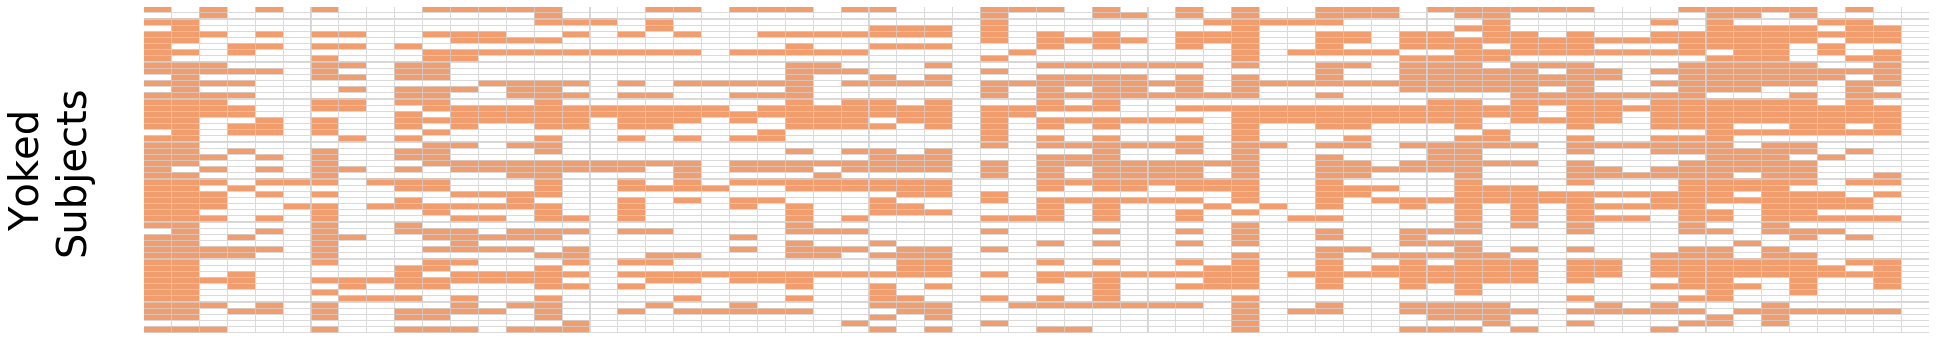

In [ ]:
# 3. raster plot: yoke condition recall per event for each subject (N=53)

import xianfunc as xf

f = './4_line_raster_dist_plots/64ev-rcl.xlsx'
d = xf.num_data_clean(xf.read_data(f,[i for i in range(1,65)],sheet=2))
m = xf.convert_list_array(xf.dict_to_lists(d)[0]).T

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Generate a binary matrix of size 18x64
binary_matrix = m
# Get the first color from the muted palette
muted_palette = sns.color_palette('muted')
first_color = muted_palette[1]  # Typically a muted blue

# Create a custom colormap: white for 0, first color for 1
cmap = ListedColormap(['white', first_color])

# Plot the binary matrix
plt.figure(figsize=(32, 6))  # Adjusted height to 3 for a flatter plot
# Create the heatmap
ax = sns.heatmap(binary_matrix, cmap=cmap, cbar=False, linewidths=0.2, 
                 linecolor='lightgrey', alpha=0.8, square=False, 
                 xticklabels=False, yticklabels=False)

# Customize the plot
# plt.title('Binary Matrix 18x64', fontsize=20)
# plt.xlabel('Events', fontsize=15)
plt.ylabel('Yoked\nSubjects\n', fontsize=40)
# plt.xticks(range(1, 65, 3), range(1, 65, 3), fontsize=14)

# Remove horizontal grid lines
# for spine in ax.spines.values():
#     spine.set_visible(False)

# Save and display the plot
plt.savefig('./4_line_raster_dist_plots/raster_recall-yoke.png', bbox_inches='tight')
plt.savefig('./4_line_raster_dist_plots/raster_recall-yoke.svg', bbox_inches='tight')
plt.show()


/Users/xli239/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:233: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


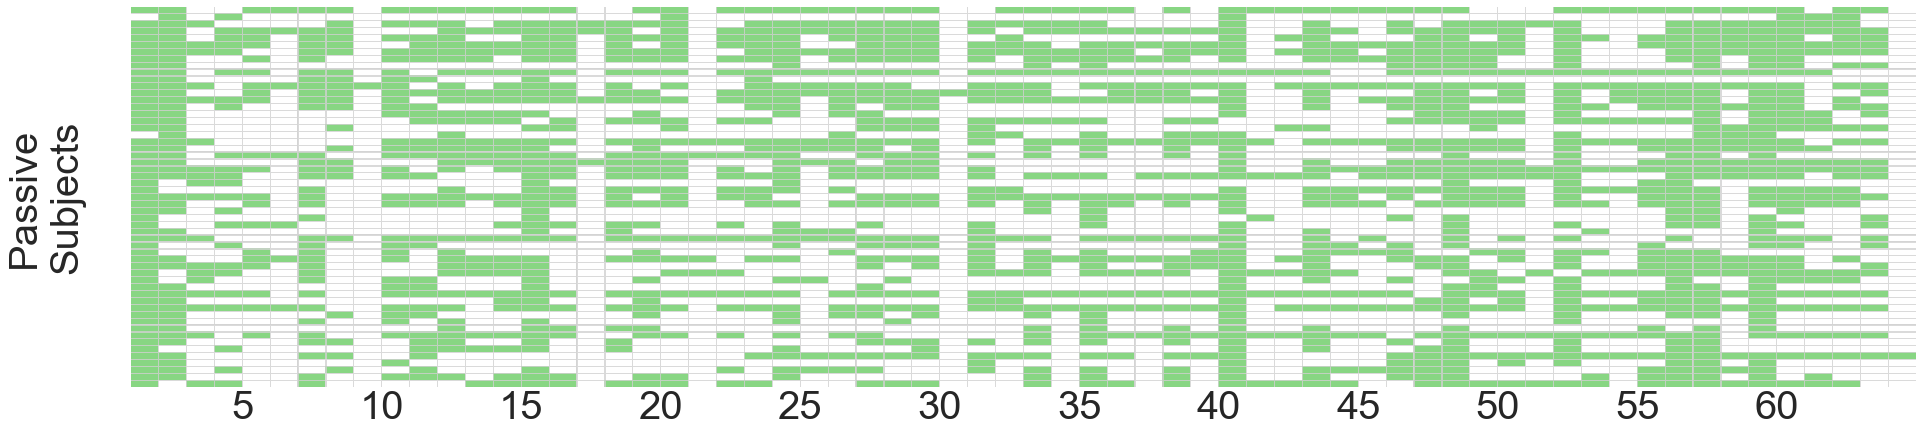

In [ ]:
# 4. raster plot: passive condition recall per event for each subject (N=55)

import xianfunc as xf

f = './4_line_raster_dist_plots/64ev-rcl.xlsx'
d = xf.num_data_clean(xf.read_data(f,[i for i in range(1,65)],sheet=3))
m = xf.convert_list_array(xf.dict_to_lists(d)[0]).T

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Generate a binary matrix of size 18x64
binary_matrix = m
# Get the first color from the muted palette
muted_palette = sns.color_palette('muted')
first_color = muted_palette[2]  # Typically a muted blue

# Create a custom colormap: white for 0, first color for 1
cmap = ListedColormap(['white', first_color])

# Plot the binary matrix
plt.figure(figsize=(32, 7))  # Adjusted height to 3 for a flatter plot
# Create the heatmap
ax = sns.heatmap(binary_matrix, cmap=cmap, cbar=False, linewidths=0.2, 
                 linecolor='lightgrey', alpha=0.8, square=False, 
                 xticklabels=20, yticklabels=False)

# Customize the plot
# plt.title('Binary Matrix 18x64', fontsize=20)
# plt.xlabel('Events', fontsize=15)
plt.ylabel('Passive\nSubjects\n', fontsize=40)
plt.xticks(range(4, 65, 5), range(5, 65, 5), fontsize=40)

# Remove horizontal grid lines
for spine in ax.spines.values():
    spine.set_visible(False)

# Save and display the plot
plt.savefig('./4_line_raster_dist_plots/raster_recall-pasv.png', bbox_inches='tight')
plt.savefig('./4_line_raster_dist_plots/raster_recall-pasv.svg', bbox_inches='tight')
plt.show()


path already exists.


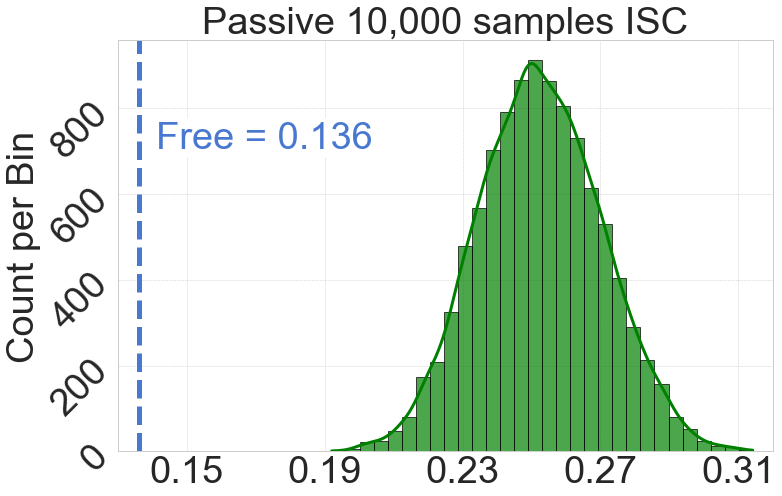

path already exists.


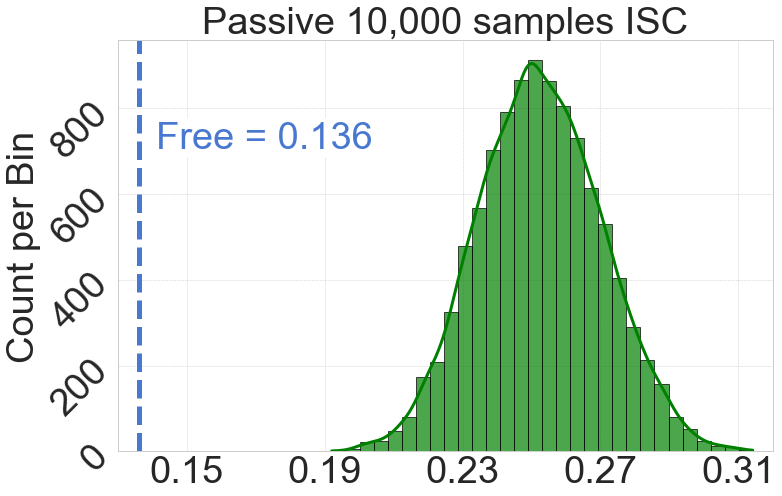

0.0

In [ ]:
# 5. histogram for 10,000 samples of 18 subjects from passive condition (with choice events: 64 events)

import xianfunc as xf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_hist_with_value(value, value_distribution, bins=30, outpath=False, fig_format='.png', dpi=300, add=False):
    import seaborn as sns
    from scipy.stats import gaussian_kde
    
    # Calculate the proportion of values in the dist <= value
    proportion = sum(1 for x in value_distribution if x <= value) / len(value_distribution)
    
    # Plot the histogram with black outlines
    counts, bin_edges, patches = plt.hist(
        value_distribution, 
        bins=bins, 
        color='green', 
        alpha=0.7, 
        edgecolor='black',  # Adding black outlines to bars
        label='Passive ISC histogram'
    )
    
    # Find the bin that contains the value and shade up to this bin
    for bin_start, bin_end, patch in zip(bin_edges[:-1], bin_edges[1:], patches):
        if bin_start <= value:
            patch.set_facecolor('grey')
        else:
            break
    
    # Get the first color from the muted palette
    muted_palette = sns.color_palette('muted')
    first_color = muted_palette[0]  # Typically a muted blue
    
    # Plot the vertical line at the given value and add a label for the legend
    plt.axvline(value, color=first_color, linestyle='--', linewidth=5, label=f'Free = {value}')    
    
    # Add a text label next to the vertical line
    plt.text(value + 0.005, max(counts) * 0.8, f'Free = {value:.3f}', 
             color=first_color, fontsize=38, verticalalignment='center', 
             bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
    
    # Overlay a KDE curve above the histogram
    kde = gaussian_kde(value_distribution)
    x_values = np.linspace(min(value_distribution), max(value_distribution), 1000)
    kde_values = kde(x_values)
    
    # Normalize KDE to match the scale of the histogram
    scale_factor = len(value_distribution) * (bin_edges[1] - bin_edges[0])
    kde_values_scaled = kde_values * scale_factor
    plt.plot(x_values, kde_values_scaled, color='green', linewidth=3)
    
    # Set the background color to white and enable the grid
    plt.gca().set_facecolor('white')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)   
    
    # Labels and title with updated font sizes
    plt.ylabel('Count per Bin', fontsize=38)
    plt.yticks(fontsize=38,rotation=45)
    
    plt.title('Passive 10,000 samples ISC', fontsize=38)
    x_min, x_max = min(value_distribution), max(value_distribution)
    x_ticks = np.arange(np.floor(x_min * 20) / 20, np.ceil(x_max * 20) / 20, 0.04)
    plt.xticks(x_ticks, fontsize=38)

    # Adjust layout to make room for the legend
    plt.tight_layout()
    
    # Save or show the plot
    if outpath:
        xf.mkdir(outpath)
        plt.savefig(outpath + fig_format, dpi=dpi)
    if not add:
        plt.show()
    p_val = proportion
    return p_val

# Example usage
outdir = './4_line_raster_dist_plots/'
f = 'dist_isc10000_64ev_pasv.csv'
isc_p = xf.read_csv(outdir + f)[0]
isc_f_m = round(0.136359477124183, 3)
outname = './4_line_raster_dist_plots/dist_64ev_pasv'

xf.plot_figsize(11, 7)
xf.plot_xylim(x_rng=(0.13, 0.32))
plot_hist_with_value(isc_f_m, isc_p, outpath=outname,fig_format='.png') 

xf.plot_figsize(11, 7)
xf.plot_xylim(x_rng=(0.13, 0.32))
plot_hist_with_value(isc_f_m, isc_p, outpath=outname,fig_format='.svg')


path already exists.


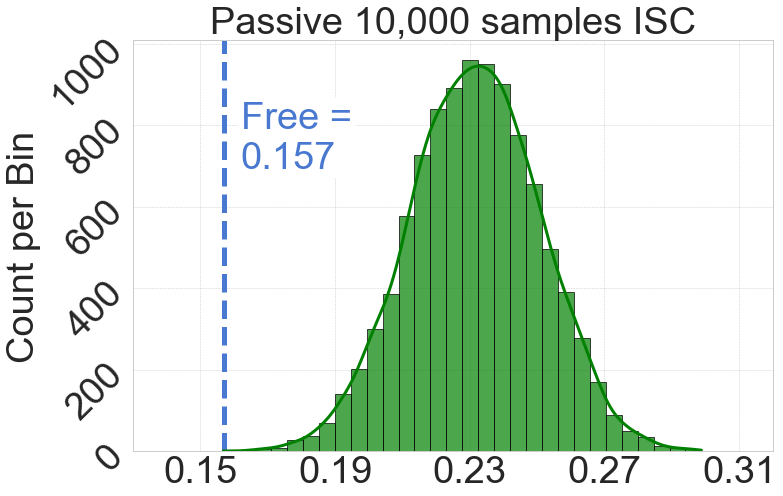

path already exists.


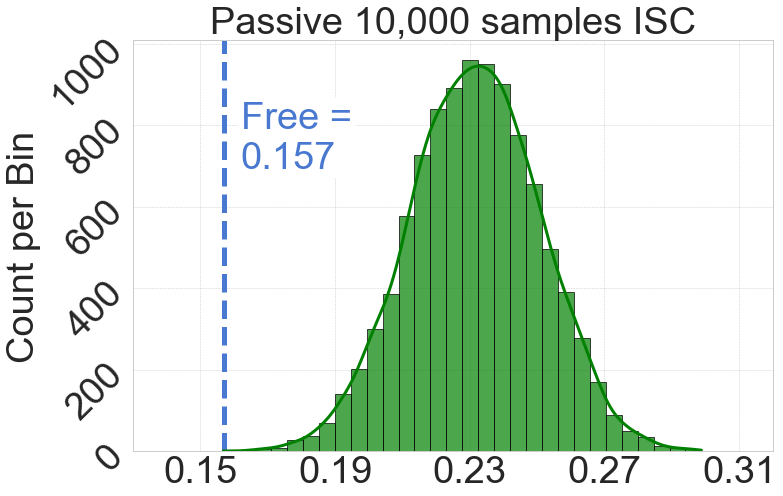

0.0001

In [ ]:
# 6. histogram for 10,000 samples of 18 subjects from passive condition (excluding choice events: 49 events)

def plot_hist_with_value(value, value_distribution, bins=30, outpath=False, fig_format='.png', dpi=300, add=False):
    import seaborn as sns
    from scipy.stats import gaussian_kde
    
    # Calculate the proportion of values in the dist <= value
    proportion = sum(1 for x in value_distribution if x <= value) / len(value_distribution)
    
    # Plot the histogram with black outlines
    counts, bin_edges, patches = plt.hist(
        value_distribution, 
        bins=bins, 
        color='green', 
        alpha=0.7, 
        edgecolor='black',  # Adding black outlines to bars
        label='Passive ISC histogram'
    )
    
    # Find the bin that contains the value and shade up to this bin
    for bin_start, bin_end, patch in zip(bin_edges[:-1], bin_edges[1:], patches):
        if bin_start <= value:
            patch.set_facecolor('grey')
        else:
            break
    
    # Get the first color from the muted palette
    muted_palette = sns.color_palette('muted')
    first_color = muted_palette[0]  # Typically a muted blue
    
    # Plot the vertical line at the given value and add a label for the legend
    plt.axvline(value, color=first_color, linestyle='--', linewidth=5, label=f'Free = {value}')    
    
    # Add a text label next to the vertical line
    plt.text(value + 0.005, max(counts) * 0.8, f'Free =\n{value:.3f}', 
             color=first_color, fontsize=38, verticalalignment='center', 
             bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
    
    # Overlay a KDE curve above the histogram
    kde = gaussian_kde(value_distribution)
    x_values = np.linspace(min(value_distribution), max(value_distribution), 1000)
    kde_values = kde(x_values)
    
    # Normalize KDE to match the scale of the histogram
    scale_factor = len(value_distribution) * (bin_edges[1] - bin_edges[0])
    kde_values_scaled = kde_values * scale_factor
    plt.plot(x_values, kde_values_scaled, color='green', linewidth=3)
    
    # Set the background color to white and enable the grid
    plt.gca().set_facecolor('white')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)   
    
    # Labels and title with updated font sizes
    plt.ylabel('Count per Bin', fontsize=38)
    plt.yticks(fontsize=38,rotation=45)
    
    plt.title('Passive 10,000 samples ISC', fontsize=38)
    x_min, x_max = min(value_distribution), max(value_distribution)
    x_ticks = np.arange(np.floor(x_min * 20) / 20, np.ceil(x_max * 20) / 20 +0.05, 0.04)
    plt.xticks(x_ticks, fontsize=38)

    # Adjust layout to make room for the legend
    plt.tight_layout()
    
    # Save or show the plot
    if outpath:
        xf.mkdir(outpath)
        plt.savefig(outpath + fig_format, dpi=dpi)
    if not add:
        plt.show()
    p_val = proportion
    return p_val

outdir = './4_line_raster_dist_plots/'
f = 'dist_isc10000_49ev-exld-choice-ev_pasv.csv'
isc_p = xf.read_csv(outdir+f)[0]
isc_f_m = round(0.15683660130718954,3)
outname = './4_line_raster_dist_plots/dist_49ev_pasv'

xf.plot_figsize(11, 7)
xf.plot_xylim(x_rng=(0.13,0.32))
plot_hist_with_value(isc_f_m, isc_p, outpath=outname,fig_format='.png') 

xf.plot_figsize(11, 7)
xf.plot_xylim(x_rng=(0.13,0.32))
plot_hist_with_value(isc_f_m, isc_p, outpath=outname,fig_format='.svg')

